In [127]:
import numpy as np
import pandas as pd
import numpy.random as random
sys.path.insert(0, '../../Libraries')
import JacksonsTSPackage as jts
from statsmodels.tsa.api import VAR

In [128]:
def mul_ten_and_mat(tensor, matrix):
    ten_shape = tensor.shape
    result = np.zeros((ten_shape[0], ten_shape[2]))
    for i in range(ten_shape[2]):
        result[:,i] = tensor[i,:,:].dot(matrix[:,i])
        #print(tensor[i,:,:], "DOT", matrix[:, i], "=", result[:,i])
    return result

N = 2000
A = np.array([
    [
        [0.8, 0, 0],
        [0, 0.8, 0],
        [0, 0, 0.8]
    ],
    [
        [0.8, 0, 0],
        [0, 0.8, 0],
        [0, 0, 0.8]
    ],
    [
        [0.8, 0, 0],
        [0, 0.8, 0],
        [0, 0, 0.8]
    ]
    ])

T = np.array([
        [1, -1, 1],
        [-1, 1, 1],
        [1, 1, -1]
    ])

tmp = np.array(
    [
        [0.1, 0.2, 0.3],
        [0.4, 0.5, 0.6],
        [0.7, 0.8, 0.9]
    ])

data_tensor = np.zeros((N, 3, 3))
data_tensor[0] = tmp
for i in range(1, N):
    data_tensor[i] = mul_ten_and_mat(A, data_tensor[i-1]) + random.uniform(-1, 1, (3, 3))# + T * i**2 / 500000
data_tensor.shape

(2000, 3, 3)

In [129]:
vectorized = pd.DataFrame(jts.tensor_to_vector(data_tensor))
vectorized

,0,1,2,3,4,5,6,7,8
0,0.100000,0.400000,0.700000,0.200000,0.500000,0.800000,0.300000,0.600000,0.900000
1,-0.733904,1.199293,1.029203,0.488712,0.765406,-0.282160,-0.301245,0.429908,1.109594
2,-0.141604,0.989603,0.281180,0.501845,0.992692,-0.708320,0.001936,0.793985,0.794243
3,0.449899,1.426214,0.910771,0.938604,-0.183360,-1.009584,0.385034,1.306024,0.791213
4,0.805087,1.750909,1.642900,1.174123,0.577347,-0.031787,0.850859,0.108201,0.997196
...,...,...,...,...,...,...,...,...,...
1995,-0.290716,1.085668,-0.027457,-0.477270,0.371566,0.713637,-0.196882,-0.614202,0.504555
1996,-0.808737,0.470338,-0.371687,-0.458702,-0.042034,0.575542,-0.229135,-0.925678,0.180201
1997,-0.117607,-0.558886,0.231868,0.579474,0.912484,0.782585,0.637905,-1.170533,0.651426
1998,-0.764435,-1.136081,0.764845,1.314425,0.559951,0.495641,0.219118,-0.873902,-0.288145


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

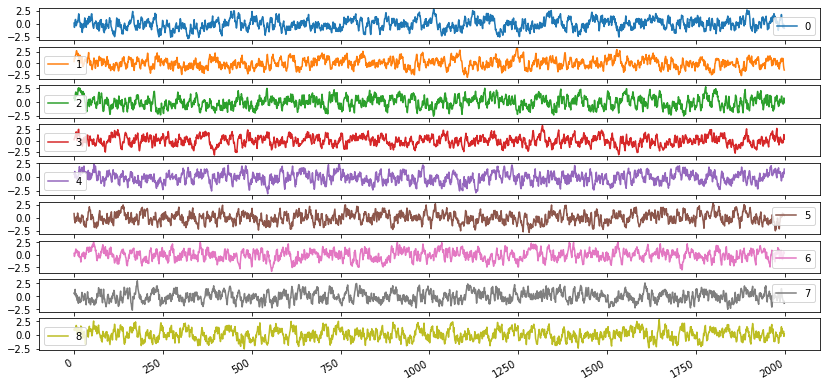

In [130]:
vectorized.plot(figsize = (14, 7), subplots = True)

In [131]:
N_train = 1800
N_test = N - N_train
print(f"N: {N}")
print(f"N_train: {N_train}")
print(f"N_test: {N_test}")

N: 2000
N_train: 1800
N_test: 200


In [132]:
train_tensor = jts.extract_train_tensor(data_tensor, N_train)
test_tensor = jts.extract_test_tensor(data_tensor, N_train, N_test)

In [133]:
train_dct = jts.apply_dct_to_tensor(train_tensor)
train_dct

array([[[ 1.20000000e+00, -3.46410162e-01,  0.00000000e+00],
        [ 3.00000000e+00, -3.46410162e-01, -5.55111512e-17],
        [ 4.80000000e+00, -3.46410162e-01, -1.38777878e-16]],

       [[-1.09287341e+00, -7.49387831e-01, -2.01257308e+00],
        [ 4.78921592e+00,  1.33261416e+00,  9.83893144e-02],
        [ 3.71327352e+00, -1.39240452e-01,  2.70311656e+00]],

       [[ 7.24354815e-01, -2.48619017e-01, -1.14335870e+00],
        [ 5.55255987e+00,  3.38820118e-01, -2.01795754e-01],
        [ 7.34207044e-01, -8.88652638e-01,  2.49206229e+00]],

       ...,

       [[-7.80503126e-01,  2.41503139e+00,  4.44009155e-01],
        [-4.77909330e+00, -5.15342665e+00,  3.04630604e-01],
        [ 8.91548618e+00, -5.67814226e-01, -2.29709466e+00]],

       [[-1.56106909e+00,  3.37999410e-01, -1.46955929e+00],
        [-2.37559941e+00, -5.57691476e+00, -1.67696000e+00],
        [ 8.60928678e+00,  1.95347367e+00, -2.76986804e+00]],

       [[-2.49483672e+00,  3.32219729e-01, -1.20345146e+00],
 

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

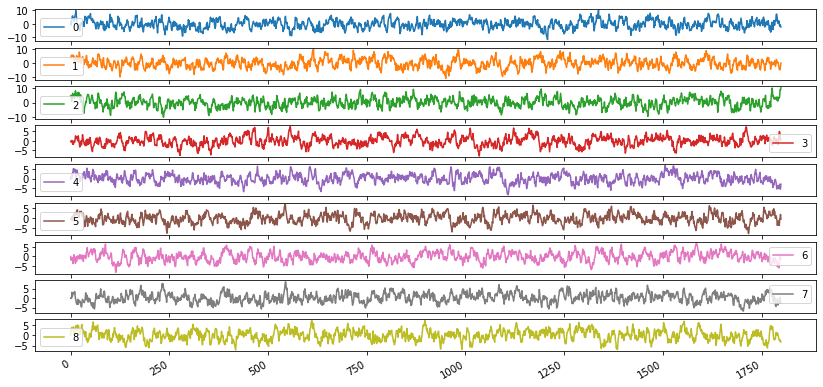

In [134]:
vectorized = pd.DataFrame(jts.tensor_to_vector(train_dct))
vectorized.plot(figsize = (14, 7), subplots = True)

In [135]:
train_model_sets = jts.split_cols_into_model_sets(train_dct, N_train)
test_model_sets = jts.split_cols_into_model_sets(test_tensor, N_test)

In [136]:
result_model_sets = np.empty((3, N_test, 3))

In [137]:
models = []
for i in range(3):
    train_df = pd.DataFrame(train_model_sets[i])
    train_df.index = pd.DatetimeIndex(train_df.index).to_period('M')
    train_diff = train_df#.diff().dropna()
    test_df = pd.DataFrame(test_model_sets[i])
    model = VAR(train_diff)
    fit = model.fit(1)
    models.append(fit)
    
    test_df.columns = test_df.columns[:].astype(str)
    results = jts.forecast(fit, train_diff, test_df, N_test, calc_conf = False)
    result_model_sets[i] = results #jts.invert_diff_transformation(results, train_df) 
result_model_sets

array([[[-2.14685492e+00,  2.84993536e-02,  8.00995305e+00],
        [-1.84893803e+00,  4.80079925e-02,  6.26125854e+00],
        [-1.59576345e+00,  5.16827875e-02,  4.90183420e+00],
        ...,
        [-3.48118358e-01, -1.30756501e-01,  9.61818265e-02],
        [-3.48118358e-01, -1.30756501e-01,  9.61818265e-02],
        [-3.48118358e-01, -1.30756501e-01,  9.61818265e-02]],

       [[ 2.93745795e-01, -2.34507054e+00, -3.41055143e-01],
        [ 2.52144128e-01, -1.85262863e+00, -2.40068299e-01],
        [ 2.09991881e-01, -1.45886432e+00, -1.70366490e-01],
        ...,
        [-1.61324672e-01,  1.18070107e-01, -1.15339506e-01],
        [-1.61324672e-01,  1.18070107e-01, -1.15339506e-01],
        [-1.61324672e-01,  1.18070107e-01, -1.15339506e-01]],

       [[-1.00434947e+00, -2.05771127e+00, -2.66652457e+00],
        [-8.41853700e-01, -1.59264830e+00, -2.16617731e+00],
        [-7.09215857e-01, -1.22027127e+00, -1.75970797e+00],
        ...,
        [-1.17777720e-01,  2.80943275e-01,

In [138]:
coef_tensor = np.array([fit.coefs[0] for fit in models])
coef_tensor

array([[[ 0.78104948, -0.01294339, -0.01185985],
        [ 0.00356111,  0.79581867,  0.00738348],
        [-0.02064373,  0.01478377,  0.77404179]],

       [[ 0.82254115, -0.01572364, -0.00188328],
        [ 0.00585161,  0.80200218, -0.00922633],
        [ 0.00198496, -0.02227032,  0.79962125]],

       [[ 0.82502159, -0.00165243, -0.00131147],
        [ 0.00375074,  0.79401242,  0.00500009],
        [ 0.00259246, -0.00270397,  0.81404582]]])

In [139]:
A

array([[[0.8, 0. , 0. ],
        [0. , 0.8, 0. ],
        [0. , 0. , 0.8]],

       [[0.8, 0. , 0. ],
        [0. , 0.8, 0. ],
        [0. , 0. , 0.8]],

       [[0.8, 0. , 0. ],
        [0. , 0.8, 0. ],
        [0. , 0. , 0.8]]])

In [140]:
jts.apply_inverse_dct_to_tensor(coef_tensor)

array([[[ 0.12446184,  0.1341282 ,  0.13193471],
        [ 0.23155716, -0.00186764, -0.22790896],
        [ 0.12983405, -0.26145455,  0.12129864]],

       [[ 0.13223729,  0.13771795,  0.14131533],
        [ 0.23095563,  0.00405071, -0.23208054],
        [ 0.12717215, -0.26620959,  0.14002992]],

       [[ 0.136808  ,  0.13794075,  0.13776204],
        [ 0.23067011, -0.00104157, -0.22775317],
        [ 0.13532581, -0.27091653,  0.13688695]]])

In [141]:
result_dct_tensor = jts.collect_result_cols_into_tensor(result_model_sets, N_test)
result_dct_tensor

array([[[-2.14685492e+00,  2.93745795e-01, -1.00434947e+00],
        [ 2.84993536e-02, -2.34507054e+00, -2.05771127e+00],
        [ 8.00995305e+00, -3.41055143e-01, -2.66652457e+00]],

       [[-1.84893803e+00,  2.52144128e-01, -8.41853700e-01],
        [ 4.80079925e-02, -1.85262863e+00, -1.59264830e+00],
        [ 6.26125854e+00, -2.40068299e-01, -2.16617731e+00]],

       [[-1.59576345e+00,  2.09991881e-01, -7.09215857e-01],
        [ 5.16827875e-02, -1.45886432e+00, -1.22027127e+00],
        [ 4.90183420e+00, -1.70366490e-01, -1.75970797e+00]],

       ...,

       [[-3.48118358e-01, -1.61324672e-01, -1.17777720e-01],
        [-1.30756501e-01,  1.18070107e-01,  2.80943275e-01],
        [ 9.61818265e-02, -1.15339506e-01,  2.53090497e-03]],

       [[-3.48118358e-01, -1.61324672e-01, -1.17777720e-01],
        [-1.30756501e-01,  1.18070107e-01,  2.80943275e-01],
        [ 9.61818265e-02, -1.15339506e-01,  2.53090497e-03]],

       [[-3.48118358e-01, -1.61324672e-01, -1.17777720e-01],
 

In [142]:
result_tensor = jts.apply_inverse_dct_to_tensor(result_dct_tensor)
result_tensor

array([[[-0.44040362, -0.023026  , -0.60999784],
        [-1.01516554,  0.69065365,  0.33876157],
        [ 0.79211727,  2.2238337 ,  0.98902555]],

       [[-0.37567755, -0.02753844, -0.52125303],
        [-0.79224787,  0.5388841 ,  0.27736777],
        [ 0.61321179,  1.76560219,  0.75181529]],

       [[-0.32354378, -0.02955529, -0.44478265],
        [-0.6159026 ,  0.41537089,  0.22637311],
        [ 0.47450713,  1.40354169,  0.57286827]],

       ...,

       [[-0.12421977, -0.01876049, -0.03107892],
        [ 0.05911503, -0.11544051, -0.00905278],
        [-0.01684353,  0.01518667,  0.04974777]],

       [[-0.12421977, -0.01876049, -0.03107892],
        [ 0.05911503, -0.11544051, -0.00905278],
        [-0.01684353,  0.01518667,  0.04974777]],

       [[-0.12421977, -0.01876049, -0.03107892],
        [ 0.05911503, -0.11544051, -0.00905278],
        [-0.01684353,  0.01518667,  0.04974777]]])

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

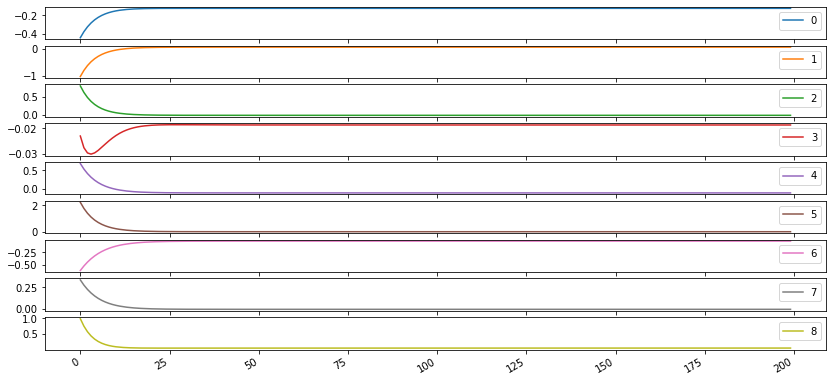

In [143]:
result_vectorized = pd.DataFrame(jts.tensor_to_vector(result_tensor))
result_vectorized.plot(figsize = (14, 7), subplots = True)

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

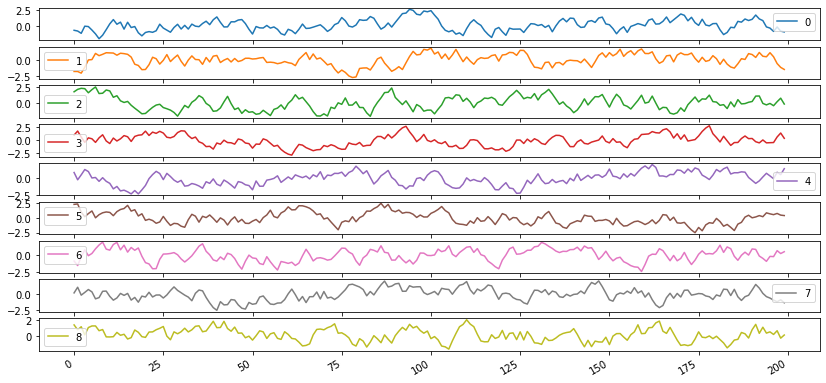

In [144]:
test_vectorized = pd.DataFrame(jts.tensor_to_vector(test_tensor))
test_vectorized.plot(figsize = (14, 7), subplots = True)

In [145]:
error = jts.calc_mape_per_matrix(test_tensor, result_tensor)
error = error.rename(columns={"MAPE": "DCT"})
error

,DCT
0,0.405636
1,0.6498
2,0.712044
3,0.910104
4,0.77586
...,...
195,0.965186
196,0.932543
197,1.02754
198,1.01729


<AxesSubplot:>

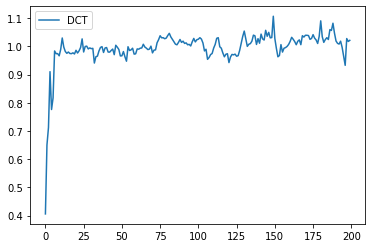

In [146]:
error.plot()

In [147]:
jts.forecast_accuracy(result_vectorized, test_vectorized)

Results
----------------------------------------------------------------------
           ME            MSE            MAE            MAPE
0       -0.290         0.880          0.732          133.837%      
1       0.012          0.778          0.716          120.907%      
2       -0.027         0.983          0.822          97.976%       
3       0.083          1.115          0.853          104.828%      
4       -0.047         0.867          0.759          126.359%      
5       0.073          0.972          0.808          103.607%      
6       -0.021         0.833          0.745          108.711%      
7       0.059          0.797          0.707          106.856%      
8       -0.074         0.600          0.637          105.061%      
